In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pywt
import seaborn as sns

sns.set_theme()
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

In [4]:
signal = list(range(1, 20))

In [14]:
def convolve_1d(s, kernel):
    rev_kernel = kernel[::-1].copy()
    padsize = kernel.size-1
    s = np.pad(s, padsize, mode='constant')
    n_steps = s.size - kernel.size + 1

    result = np.zeros(n_steps, dtype=np.double)
    n_ker = kernel.size
    for i in range(n_steps):
        result[i] = np.dot(s[i: i + n_ker], rev_kernel)
    return result

In [15]:
def decompose(sgnl: np.array, level: int, dec_high: np.array, dec_low: np.array) -> list:
    padlen = len(dec_low)
    sg = np.pad(sgnl, padlen, mode='edge')
    ca = convolve_1d(sg, dec_low)[1 + padlen:-padlen:2]
    cd = convolve_1d(sg, dec_high)[1 + padlen:-padlen:2]
    out = [cd]
    for i in range(level - 1):
        ca = np.pad(ca, padlen, mode='edge')
        out.append(convolve_1d(ca, dec_high)[1 + padlen:-padlen:2])
        ca = convolve_1d(ca, dec_low)[1 + padlen:-padlen:2]
    return [ca] + list(reversed(out))

mineLen: 12, decLen: 12


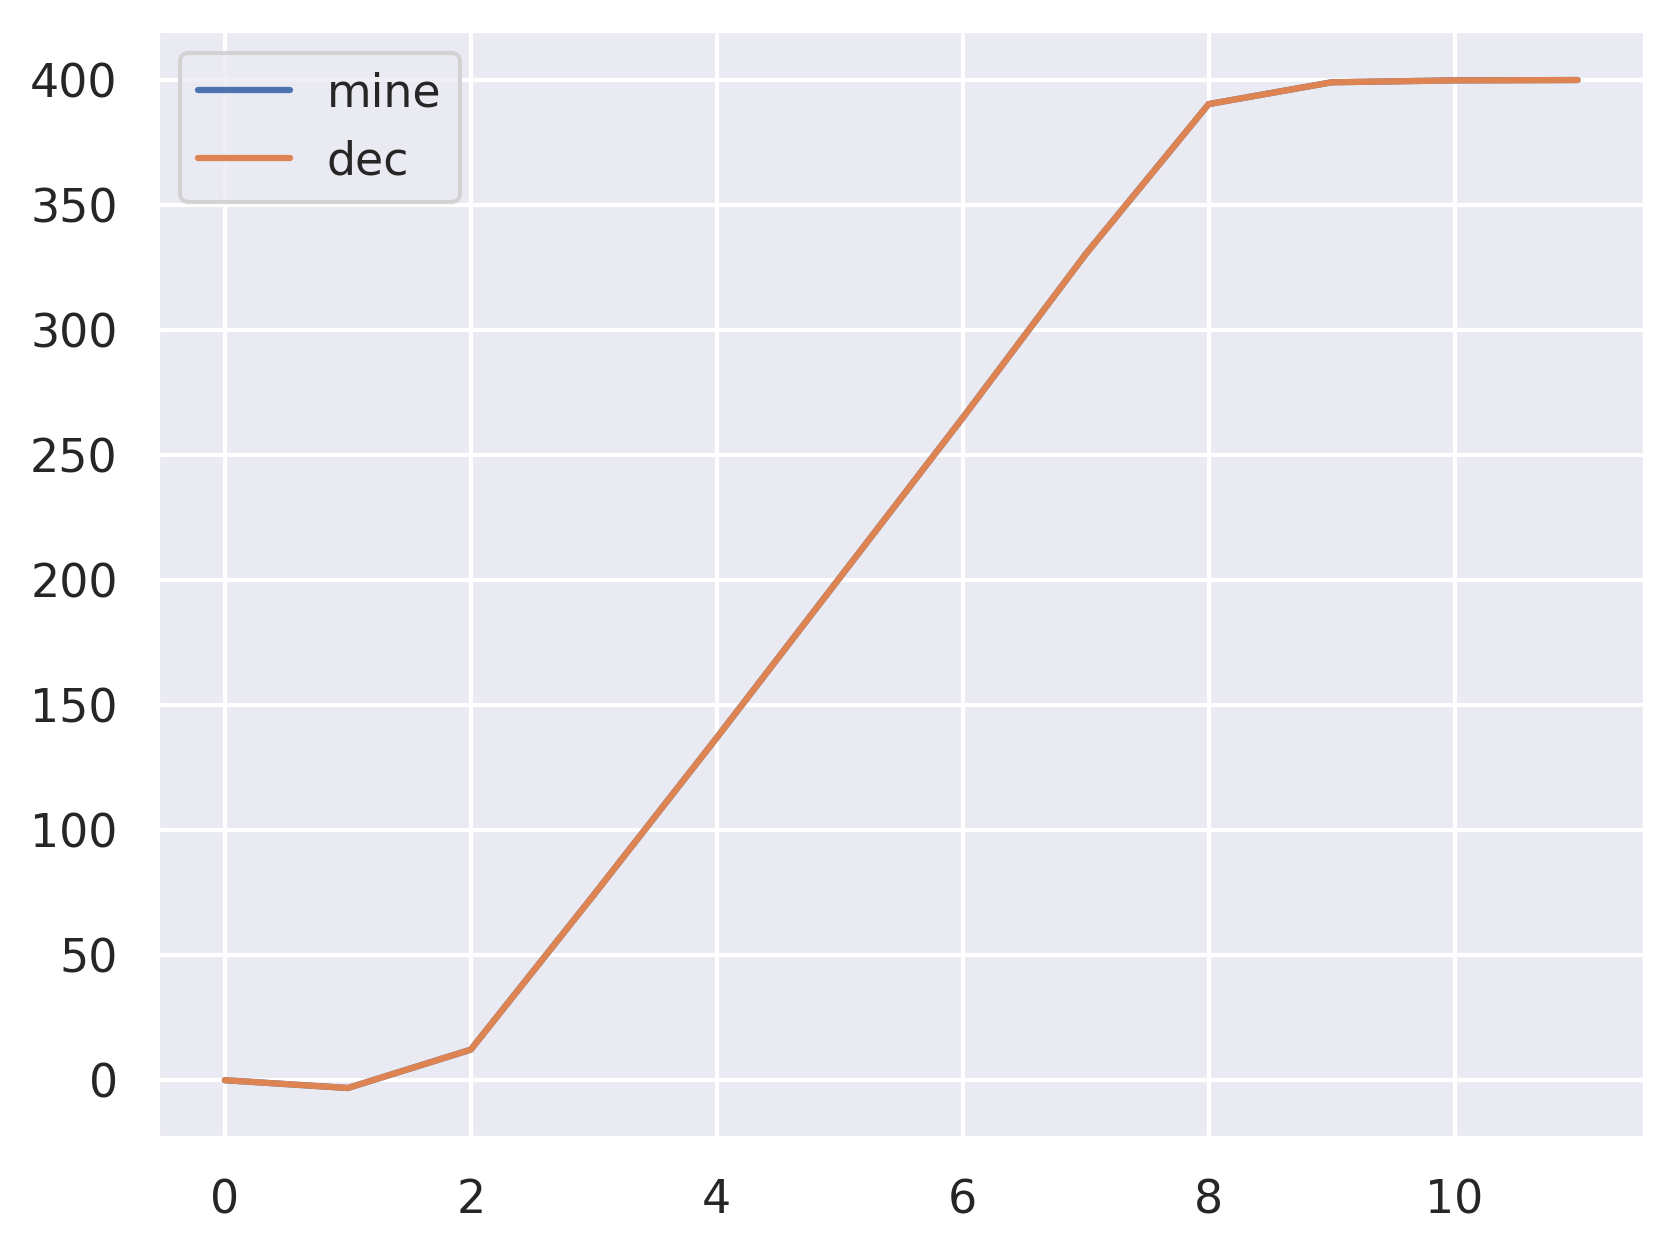

In [16]:
signal = np.linspace(0, 100, 101)
wavelet = pywt.Wavelet('sym4')
dec_lo, dec_hi, rec_lo, rec_hi = wavelet.filter_bank

level = 4
mine = decompose(signal, level=level, dec_high=np.array(dec_hi), dec_low=np.array(dec_lo))
dec = pywt.wavedec(signal, wavelet, level=level, mode='constant')

print(f"mineLen: {len(mine[0])}, decLen: {len(dec[0])}")

plt.plot(dec[0])
plt.plot(mine[0])
plt.legend(["mine", "dec"])